# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
row_data=pd.read_csv('Categorical.csv')
row_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
continent    241 non-null object
dtypes: float64(2), object(2)
memory usage: 7.6+ KB


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
map_data=row_data.copy()
map_data['continent']=map_data['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
map_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


## Select the features

In [5]:
x=map_data.iloc[:,3:4]
x.head()

,continent
0,0
1,2
2,3
3,0
4,1


## Clustering

Use 4 clusters initially.

In [6]:
kmean=KMeans(7)
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [7]:
idf_cluster=kmean.fit_predict(x)
idf_cluster

array([5, 3, 2, 5, 0, 0, 0, 3, 1, 3, 4, 6, 4, 6, 5, 4, 0, 3, 2, 0, 2, 2,
       3, 0, 3, 5, 5, 0, 5, 0, 5, 5, 1, 1, 5, 3, 3, 2, 2, 0, 1, 3, 2, 2,
       2, 2, 4, 1, 2, 2, 5, 5, 5, 5, 3, 3, 0, 0, 2, 5, 0, 5, 2, 1, 2, 2,
       0, 0, 2, 0, 4, 1, 0, 0, 4, 2, 0, 3, 0, 2, 2, 2, 2, 2, 0, 5, 5, 5,
       4, 1, 3, 6, 5, 0, 5, 0, 3, 0, 3, 3, 6, 0, 3, 3, 0, 3, 0, 5, 0, 3,
       3, 3, 3, 2, 3, 3, 4, 5, 3, 0, 3, 3, 3, 2, 2, 5, 0, 3, 2, 0, 0, 0,
       3, 5, 2, 0, 0, 2, 6, 5, 4, 0, 2, 0, 3, 0, 3, 4, 2, 2, 5, 6, 2, 3,
       2, 4, 2, 4, 2, 5, 4, 0, 0, 3, 4, 4, 3, 3, 5, 4, 1, 3, 4, 4, 0, 5,
       3, 0, 1, 3, 4, 3, 0, 0, 2, 2, 3, 2, 2, 2, 3, 6, 6, 4, 2, 5, 0, 2,
       2, 5, 0, 2, 1, 0, 0, 0, 2, 5, 6, 3, 5, 2, 2, 3, 3, 3, 3, 4, 5, 2,
       3, 3, 2, 2, 0, 1, 5, 3, 0, 5, 1, 5, 5, 3, 4, 4, 4, 3, 2, 2, 2])

In [8]:
data_with_cluster=map_data.copy()
data_with_cluster['cluster']=idf_cluster
data_with_cluster.head()

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,0,5
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,2
3,Anguilla,-63.064989,18.223959,0,5
4,Albania,20.049834,41.142450,1,0


## Plot the data

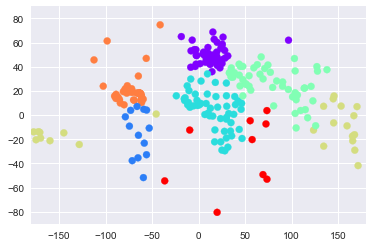

In [9]:
plt.scatter(map_data['Longitude'],map_data['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.